In [32]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import StatevectorSimulator

In [33]:
from qiskit import AncillaRegister

def oracle_0(n: int):
    return QuantumCircuit(QuantumRegister(n,name='q'))

def oracle_1(n: int):
    qc = QuantumCircuit(QuantumRegister(n,name='q'))
    for i in range(n):
        qc.x(i)
    return qc

def oracle_balance(n: int, f: int):
    anc = AncillaRegister(1)
    qc = QuantumCircuit(QuantumRegister(n,name='q'),anc)
    for i in range(n):
        if (f & 1<<i):
            qc.x(i)
    qc.barrier()

    for i in range(n):
        qc.cx(i,anc)
    qc.barrier()

    for i in range(n):
        if (f & 1<<i):
            qc.x(i)
    return qc


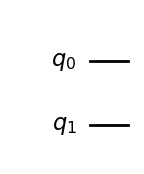

In [34]:
o0 = oracle_0(2)
o0.draw(output='mpl')

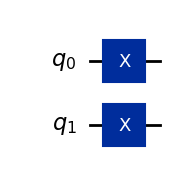

In [35]:
o1 = oracle_1(2)
o1.draw(output='mpl')

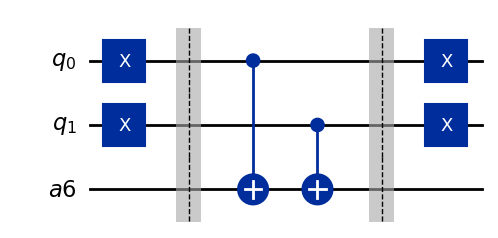

In [36]:
oqc = oracle_balance(2,int("0b0011",2))
oqc.draw(output='mpl')

In [37]:
def pre_oracle_qc(oracle: QuantumCircuit):
    qubits = oracle.qubits
    n = len(qubits) - len(oracle.ancillas)

    pre_oracle_qc = QuantumCircuit(qubits)
    for i in range(n):
        pre_oracle_qc.h(i)

    if len(oracle.ancillas):
        pre_oracle_qc.x(n)
        pre_oracle_qc.h(n)
    return pre_oracle_qc

def post_oracle_qc(oracle: QuantumCircuit):
    qubits = oracle.qubits
    n = len(qubits) - len(oracle.ancillas)

    post_oracle_qc = QuantumCircuit(qubits)
    for i in range(n):
        post_oracle_qc.h(i)

    post_oracle_qc.measure_all()
    return post_oracle_qc


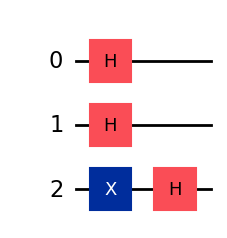

In [38]:
preo = pre_oracle_qc(oqc)
preo.draw(output='mpl')

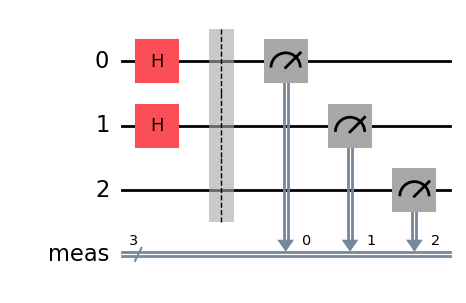

In [39]:
posto = post_oracle_qc(oqc)
posto.draw(output='mpl')

In [40]:
def deutsch_josza_circuit(oracle: QuantumCircuit):
    pre = pre_oracle_qc(oracle)
    post = post_oracle_qc(oracle)
    pre.compose(oracle.compose(post,oracle.qubits), oracle.qubits, inplace=True)
    return pre
    

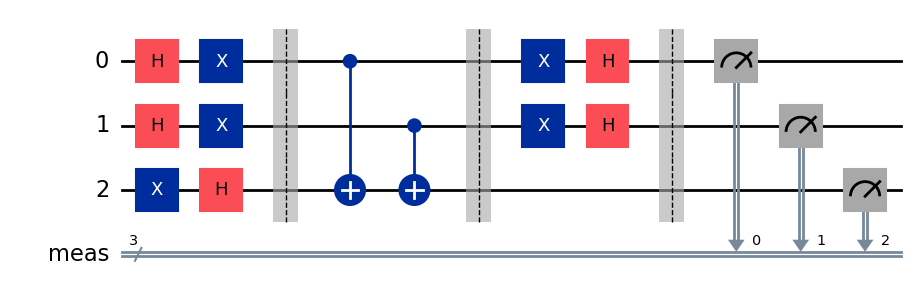

In [41]:
djqc = deutsch_josza_circuit(oqc)
djqc.draw(output='mpl')

In [42]:
backend = StatevectorSimulator()
job = backend.run(djqc,memory=True)
result =  job.result()
result.get_memory()

['011']